In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_images=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train_images=train_data.iloc[:,1:]
train_labels=train_data.iloc[:,0]
train_images=train_images.to_numpy()
train_labels=train_labels.to_numpy()
test_images=test_images.to_numpy()


In [3]:
#reshape data
train_images=train_images.reshape(train_images.shape[0],28,28,1)
train_labels=train_labels.reshape(train_labels.shape[0],1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

In [4]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

/opt/conda/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


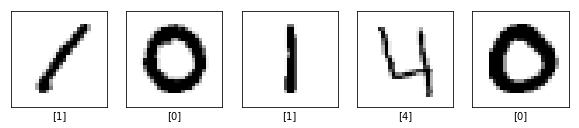

In [5]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [6]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=5,validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 52s 2ms/sample - loss: 1.5867 - accuracy: 0.8785 - val_loss: 1.5011 - val_accuracy: 0.9610
Epoch 2/5
33600/33600 [==============================] - 51s 2ms/sample - loss: 1.5167 - accuracy: 0.9456 - val_loss: 1.4881 - val_accuracy: 0.9729
Epoch 3/5
33600/33600 [==============================] - 51s 2ms/sample - loss: 1.5056 - accuracy: 0.9561 - val_loss: 1.4858 - val_accuracy: 0.9749
Epoch 4/5
33600/33600 [==============================] - 50s 1ms/sample - loss: 1.5005 - accuracy: 0.9613 - val_loss: 1.4801 - val_accuracy: 0.9818
Epoch 5/5
33600/33600 [==============================] - 52s 2ms/sample - loss: 1.4968 - accuracy: 0.9650 - val_loss: 1.4807 - val_accuracy: 0.9800


In [9]:
probability_model = tf.keras.Sequential([model, 
                                         ])

In [10]:
predictions = probability_model.predict(test_images)

In [11]:
def submission_file(submission):
    submission=np.argmax(predictions,axis=1)
    submission=pd.DataFrame(submission)
    submission.index = np.arange(1, len(submission)+1)
    submission= submission.rename_axis('ImageId').reset_index()
    submission=submission.rename(columns={0:'Label'})
    submission.index = np.arange(1, len(submission)+1)
    return submission
submission=submission_file(predictions)


In [12]:
submission

,ImageId,Label
1,1,2
2,2,0
3,3,9
4,4,9
5,5,3
...,...,...
27996,27996,9
27997,27997,7
27998,27998,3
27999,27999,9


In [13]:
submission.to_csv('submission.csv',index=False)